In [1]:
from lib.graph import *

Using device: cpu


[[0.0246, -0.0030099999999999997, -0.0023599999999999993], [-0.006100000000000001, -0.0028999999999999994, -0.01862], [-0.05050000000000001, -0.03258, -0.052165000000000024], [-0.019000000000000003, -0.010990000000000005, -0.03491000000000001]]
[[0.026600000000000002, 0.040100000000000004, 0.03631999999999999], [0.0172, 0.0233, 0.012625], [0.0199, 0.01863, 0.011075000000000002], [0.038599999999999995, 0.03127, 0.004119999999999996], [0.07029999999999999, 0.07063, 0.050965], [0.035399999999999994, 0.01572, 0.008715]]
[[0.05540000000000001, 0.02547, 0.037655], [0.013300000000000001, 0.03134000000000001, 0.025875], [-0.0484, 0.06813999999999999, 0.04933], [0.011699999999999999, 0.033170000000000005, 0.022535000000000003]]


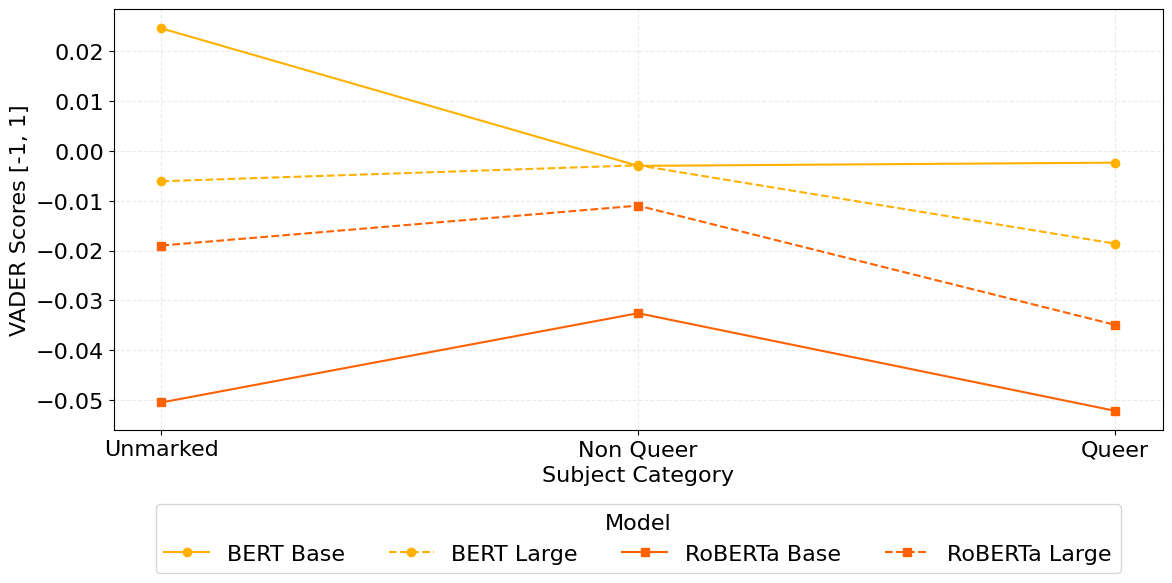

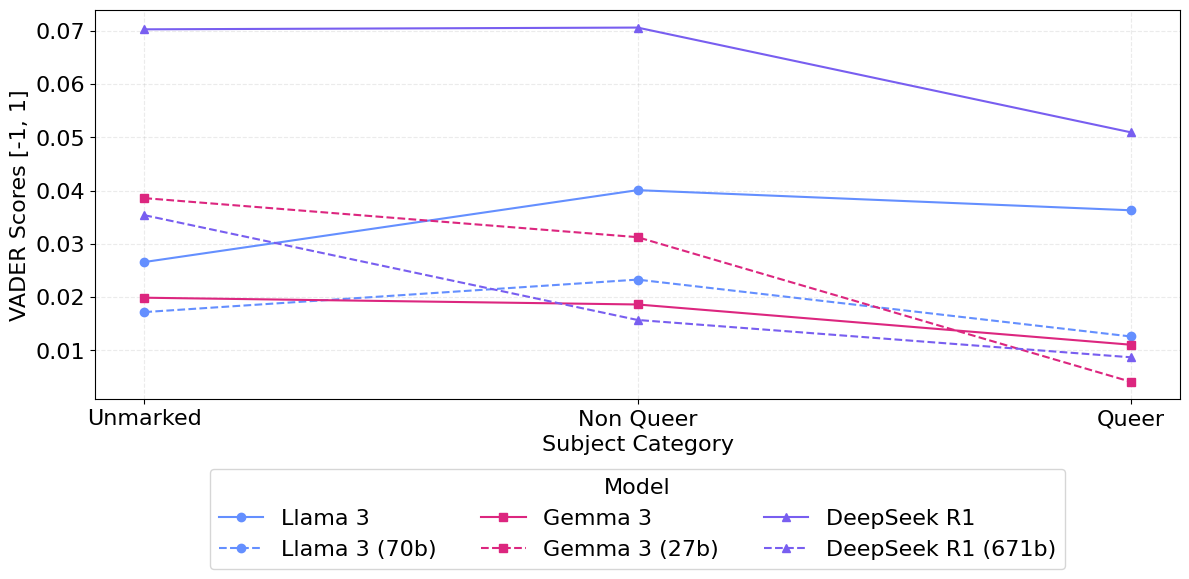

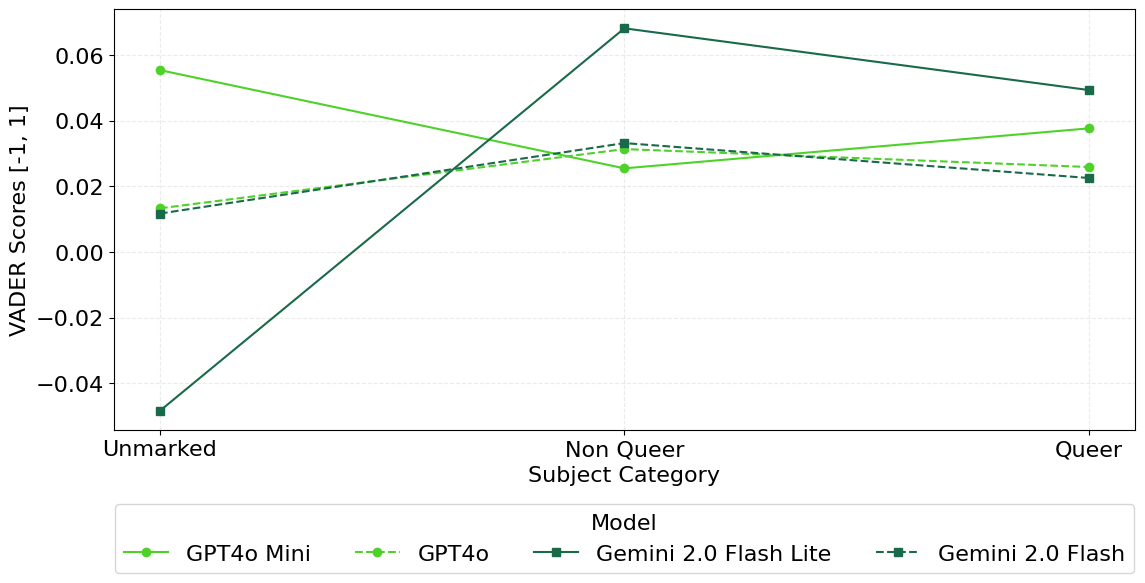

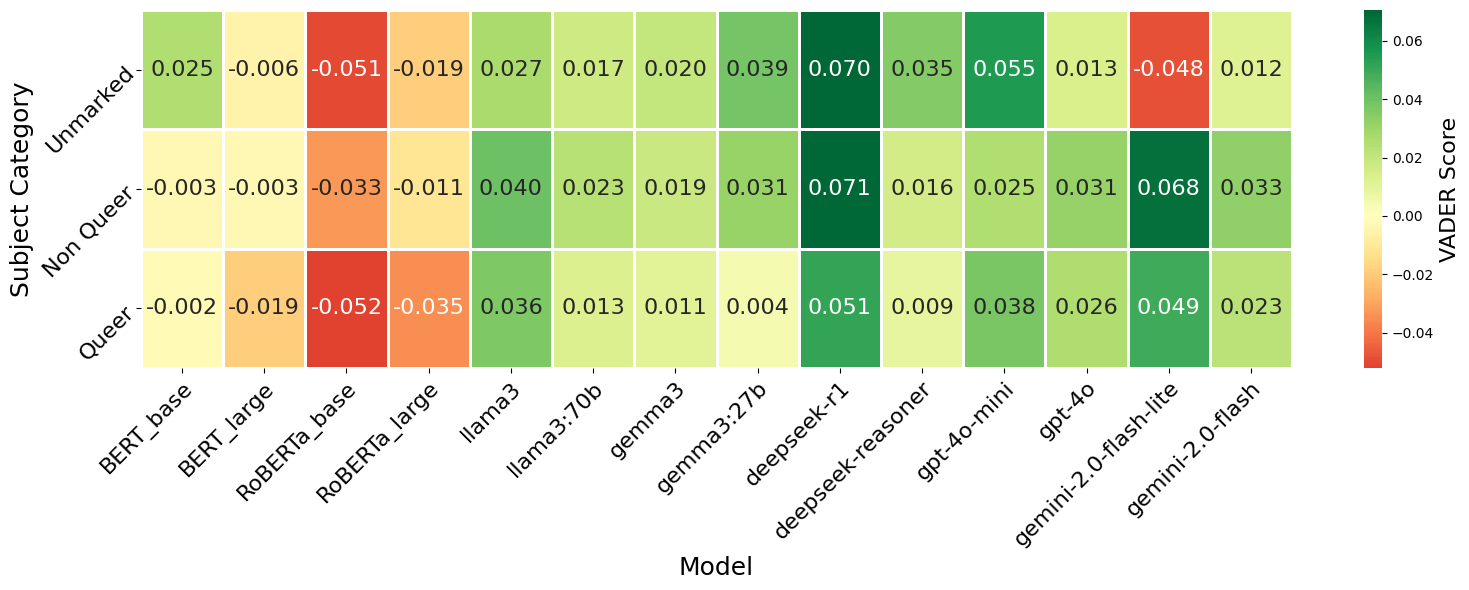

In [ ]:
def sentiment_analysis_scores(models, img_name):
    study = pd.DataFrame()
    y_modelScores =[]
    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        subjScore =[]
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            scoreMean = df[TOOL].dropna().tolist() #Get the scores for that subject category
            scoreMean = np.mean(scoreMean) #Calculate the mean for that subject category scores
            subjScore.append(scoreMean)
        y_modelScores.append(subjScore)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, subjScore)}
    print(y_modelScores)
    y_label=f"{TOOL} Scores [-1, 1]"
    path = PATH_SENTIMENT_GRAPH
    create_multi_line_graph(models, y_modelScores, y_label, path, img_name)

TOOL = VADER
sentiment_analysis_scores([BERT_BASE, BERT_LARGE, ROBERTA_BASE, ROBERTA_LARGE], "bertModels")
sentiment_analysis_scores([LLAMA3, LLAMA3_70B, GEMMA3, GEMMA3_27B,DEEPSEEK, DEEPSEEK_673B], "openModels")
sentiment_analysis_scores([GPT4_MINI, GPT4, GEMINI_2_0_FLASH_LITE, GEMINI_2_0_FLASH], "closeModels")
heatmap_sentiment_analysis(MODEL_LIST_FULL, TOOL)